# Lectura de Datos

In [250]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [251]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [252]:
import warnings
warnings.filterwarnings('ignore')

In [253]:
df = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/train_PAY_AMT2.csv', delimiter='|')
df.shape

(5625, 20)

In [254]:
df.head()

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,16632,"200,000.00",2,2,1,46,0,0,0,0,"103,173.00","104,137.00","103,422.00","95,206.00","65,108.00","5,000.00","3,300.00","2,500.00","2,930.00","1,500.00"
1,4832,"30,000.00",1,2,2,21,0,0,0,0,"25,917.00","17,072.00","15,994.00","12,017.00","5,614.00","1,270.00",367.00,336.00,112.00,0.00
2,1890,"30,000.00",2,2,1,23,0,0,0,-1,"27,228.00","24,921.00","25,945.00","20,634.00","1,600.00","1,500.00","5,229.00",942.00,"1,704.00",0.00
3,17116,"170,000.00",2,1,2,30,-1,-1,-2,-2,0.00,550.00,0.00,0.00,0.00,550.00,0.00,0.00,0.00,0.00
4,12357,"30,000.00",2,2,2,46,0,0,0,0,"60,079.00","26,882.00","27,570.00","28,075.00","29,065.00","1,500.00","1,135.00","1,100.00","1,455.00",775.00


__Diccionario de datos__

* CUSTOMER ID: Identificador de cada cliente
* LIMIT BAL: Monto de la línea de crédito
* SEX: Genero (1=masculino, 2=femenino)
* EDUCATION: (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
* MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
* AGE: Edad en años.
* PAY 0: Estatus de pago en Septiembre, 2005 (
    -2=no uso (non use),
    0=uso, 
    -1=pago correcto, 
    1=pago retrasado por un mes, 
    2=pago retrasado por dos meses , 
    ... 8=pago retrasado por ocho meses, 
    \* pago retrasado por nueve o mas meses).
* PAY 2: Estatus de pago en Agosto, 2005 (La escala es igual que en PAY 0).
* PAY 3: Estatus de pago en Julio, 2005 (La escala es igual que en PAY 0).
* PAY 4: Estatus de pago en Junio, 2005 (La escala es igual que en PAY 0).
* PAY 5: Estatus de pago en Mayo, 2005 (La escala es igual que en PAY 0).
* PAY 6: Estatus de pago en Abril, 2005 (La escala es igual que en PAY 0).
* BILL AMT1: Monto por pagar en Septiembre, 2005
* BILL AMT2: Monto por pagar en Agosto, 2005
* BILL AMT3: Monto por pagar en Julio, 2005
* BILL AMT4: Monto por pagar en Junio, 2005
* BILL AMT5: Monto por pagar en Mayo, 2005
* BILL AMT6: Monto por pagar en Abril, 2005
* PAY AMT1: Cantidad pagada en Septiembre, 2005
* PAY AMT2: Cantidad pagada en Agosto, 2005
* PAY AMT3: Cantidad pagada en Julio, 2005
* PAY AMT4: Cantidad pagada en Junio, 2005
* PAY AMT5: Cantidad pagada en Mayo, 2005
* PAY AMT6: Cantidad pagada en Abril, 2005
* default.payment.next.month: Incumplimiento de pago (1=si, 0=no)


__Objetivo (REGRESIÓN)__

PAY AMT1: Cantidad pagada en Septiembre, 2005. Para esta solución deben usarse los conjuntos train_PAY_AMT1.csv y val PAY_AMT1.csv.

# Análisis Exploratorio de Datos

In [255]:
df.isna().sum() / df.shape[0]*100

CUSTOMER_ID   0.00
LIMIT_BAL     0.00
SEX           0.00
EDUCATION     0.00
MARRIAGE      0.00
AGE           0.00
PAY_3         0.00
PAY_4         0.00
PAY_5         0.00
PAY_6         0.00
BILL_AMT2     0.00
BILL_AMT3     0.00
BILL_AMT4     0.00
BILL_AMT5     0.00
BILL_AMT6     0.00
PAY_AMT2      0.00
PAY_AMT3      0.00
PAY_AMT4      0.00
PAY_AMT5      0.00
PAY_AMT6      0.00
dtype: float64

In [256]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,"5,625.00","15,003.95","8,655.41",3.00,"7,446.00","15,151.00","22,461.00","29,999.00"
LIMIT_BAL,"5,625.00","169,045.33","129,669.79","10,000.00","50,000.00","140,000.00","240,000.00","720,000.00"
SEX,"5,625.00",1.60,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,"5,625.00",1.86,0.81,0.00,1.00,2.00,2.00,6.00
MARRIAGE,"5,625.00",1.55,0.52,0.00,1.00,2.00,2.00,3.00
AGE,"5,625.00",35.65,9.27,21.00,28.00,34.00,42.00,73.00
PAY_3,"5,625.00",-0.22,1.17,-2.00,-1.00,0.00,0.00,7.00
PAY_4,"5,625.00",-0.26,1.14,-2.00,-1.00,0.00,0.00,7.00
PAY_5,"5,625.00",-0.30,1.11,-2.00,-1.00,0.00,0.00,7.00
PAY_6,"5,625.00",-0.33,1.12,-2.00,-1.00,0.00,0.00,7.00


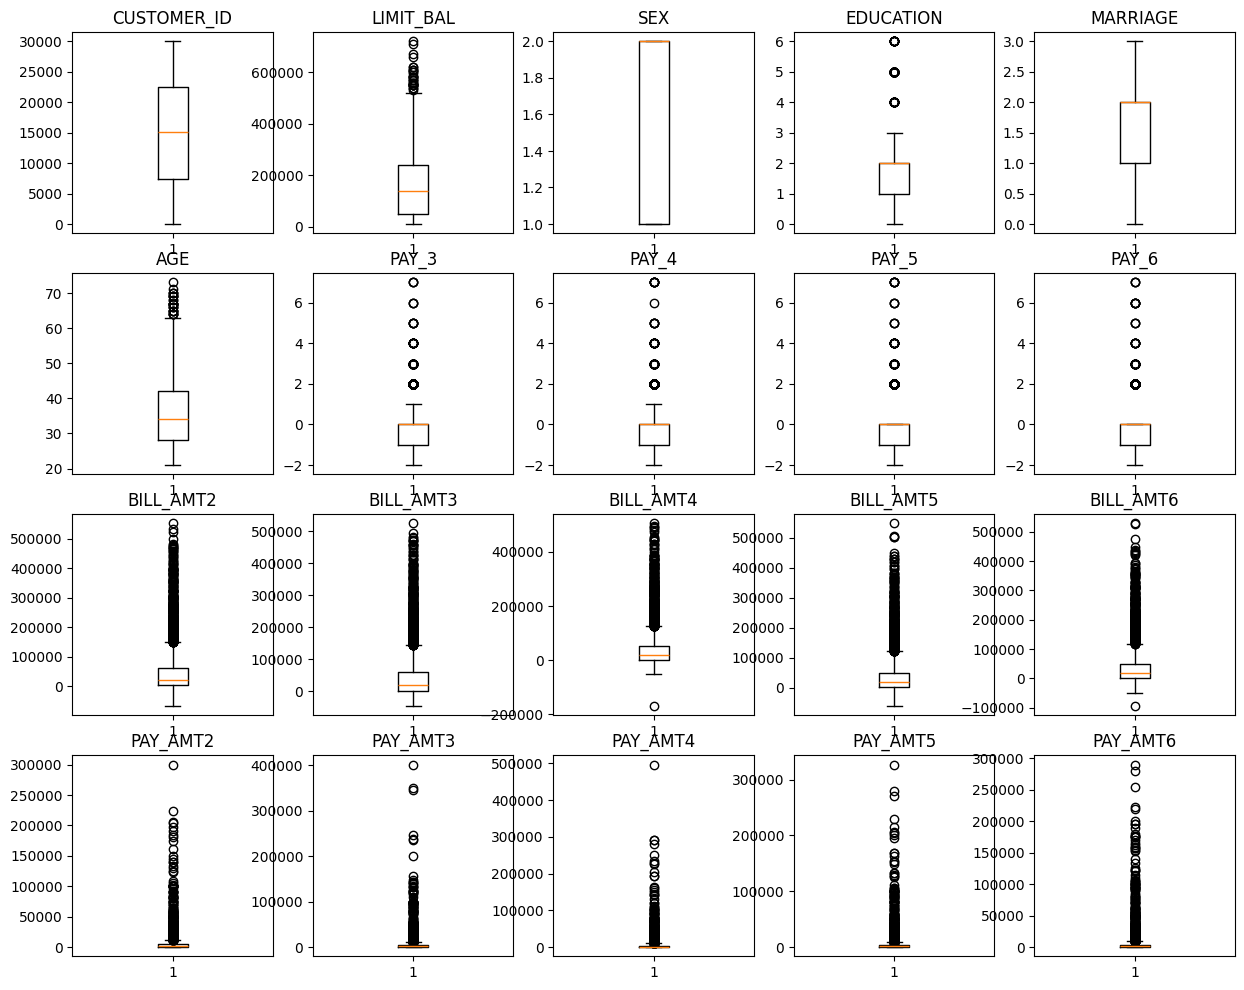

In [257]:
# numeric columns in DataFrame
col_df_num = df.columns.to_list()

n_cols = 5
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(15, 12))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

### Eliminamos outliers

In [258]:
df[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3']].describe(percentiles=[0.01, .25, .5, .75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
PAY_AMT6,"5,625.00","4,957.64","15,916.98",0.00,0.00,99.00,"1,420.00","4,000.00","76,524.52","290,000.00"
PAY_AMT5,"5,625.00","4,850.11","15,059.46",0.00,0.00,164.00,"1,500.00","4,006.00","70,014.08","326,889.00"
PAY_AMT4,"5,625.00","5,039.04","16,586.98",0.00,0.00,246.00,"1,500.00","4,200.00","70,104.12","497,000.00"
PAY_AMT3,"5,625.00","5,114.86","15,551.56",0.00,0.00,390.00,"1,800.00","4,670.00","71,971.00","400,972.00"


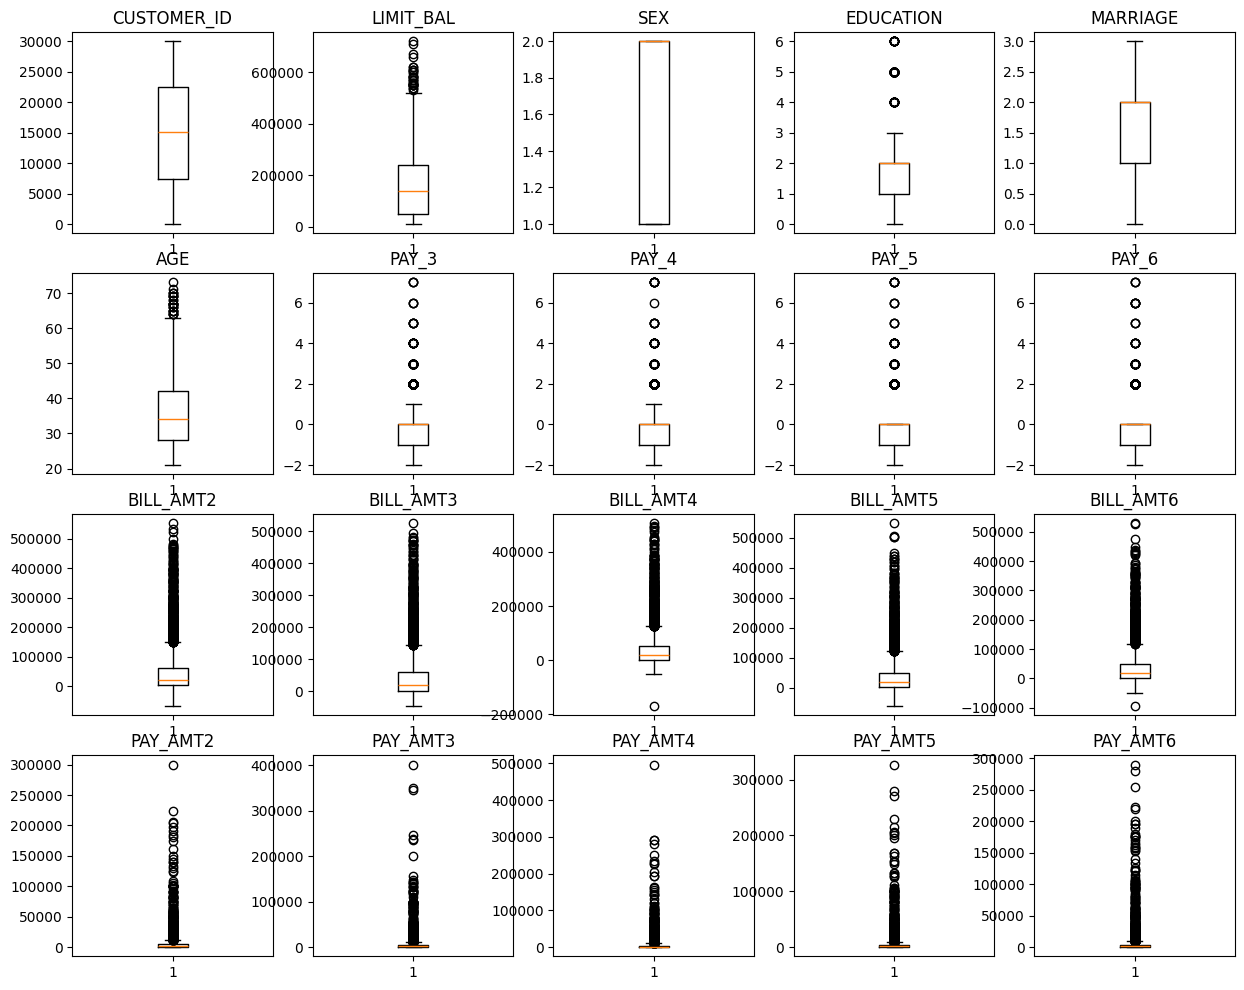

In [259]:
# numeric columns in DataFrame
col_df_num = df.columns.to_list()

n_cols = 5
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(15, 12))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

# Ingeniería de Variables

## Número de meses con retraso

In [260]:
# Orden de los meses
df[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3'] ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3
2861,-2,-2,-2,-2
3622,2,2,2,2
4661,0,0,0,0
3111,0,0,0,0
4420,-1,-1,-1,-1


In [261]:
df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3']].apply(lambda row: (row > 0).sum(), axis=1)
df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
df[ 'Max_Retraso_Reciente' ] = df[['PAY_4', 'PAY_3']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

In [262]:
lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

# orden de los meses y total de meses de retraso en el pago
df[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3'] + lst_var_1 ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente
4719,0,0,0,0,0,0,0
521,-1,-1,-1,-1,0,0,0
308,0,0,0,0,0,0,0
4176,-2,-2,-2,-2,0,0,0
4935,2,3,4,2,4,4,4


### Saldo de la deuda

In [263]:
df[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2']].sample(5)

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2
2552,"18,994.00","18,874.00","50,106.00","61,710.00","63,733.00"
1471,"27,337.00","29,156.00","29,367.00","40,928.00","44,626.00"
3061,"77,111.00","75,513.00","73,702.00","142,622.00","104,343.00"
3608,"128,253.00","152,053.00","153,896.00","158,098.00","158,557.00"
4549,"24,311.00","23,815.00","23,504.00","22,495.00","21,465.00"


In [264]:
df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT4','BILL_AMT2','BILL_AMT3']].apply(lambda row: row.mean(), axis=1)
df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT2'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT2'] / row['LIMIT_BAL'])*100, axis=1)
df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*6)*100 , axis=1)

In [265]:
lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
df[['LIMIT_BAL', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3','BILL_AMT2'] + lst_var_2].sample(5)

,LIMIT_BAL,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Prom_porcen_uso_Credito_Actual,Utilizacion_Credito_Promedio
2450,"280,000.00","1,572.00","1,572.00","2,437.00","1,572.00","2,872.00","2,293.67","1,300.00","10,025.00","2,872.00","287,200.00",1.03,21.48
1247,"500,000.00","93,159.00","71,797.00","52,030.00","54,759.00","23,032.00","43,273.67","-31,727.00","294,777.00","93,159.00","2,303,200.00",4.61,353.73
1096,"300,000.00",0.00,0.00,"3,550.00",150.00,0.00,"1,233.33",-150.00,"3,700.00","3,550.00",0.00,0.00,7.40
3498,"200,000.00","7,354.00","24,583.00","24,091.00","9,855.00","7,940.00","13,962.00","-1,915.00","73,823.00","24,583.00","794,000.00",3.97,221.47
3377,"50,000.00","20,221.00","20,146.00","20,017.00","19,917.00","19,486.00","19,806.67",-431.00,"99,787.00","20,221.00","1,948,600.00",38.97,"1,197.44"


### Cantidad pagada

In [266]:
df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3']].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3
3078,"2,000.00","1,700.00","1,500.00","2,000.00"
4046,2.00,"3,002.00",0.00,"5,600.00"
3096,"8,000.00","8,100.00","8,100.00","9,000.00"
1071,"2,200.00","2,600.00","3,000.00","2,700.00"
824,"2,000.00","1,000.00","2,000.00","3,000.00"


In [267]:
def get_mean_pay(row):
    m = []
    if row['PAY_AMT6'] > 0:
        m.append( row['BILL_AMT6']/row['PAY_AMT6'] )
    if row['PAY_AMT5'] > 0:
        m.append( row['BILL_AMT5']/row['PAY_AMT5'] )
    if row['PAY_AMT4'] > 0:
        m.append( row['BILL_AMT4']/row['PAY_AMT4'] )
    if row['PAY_AMT3'] > 0:
        m.append( row['BILL_AMT3']/row['PAY_AMT3'] )
    #if row['PAY_AMT2'] > 0:
    #    m.append( row['BILL_AMT2']/row['PAY_AMT2'] )
    
    if len(m) != 0:
        return  sum(m) / len(m)
    
    return 0

In [268]:
df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT4','PAY_AMT3','PAY_AMT5']].apply(lambda row: row.sum()/3, axis=1)
df['Suma_Pagos_Historicos'] = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3']].apply(lambda row: row.sum(), axis=1)
df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT3'] - row['PAY_AMT4'], axis=1)
df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT3'] > 0, (df['PAY_AMT3'] / df['BILL_AMT3'])*100, 0)

In [269]:
df['LIMIT_BAL_sq'] = df['LIMIT_BAL'] ** 2

In [270]:
lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior', 'LIMIT_BAL_sq']
df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3'] + lst_var_3].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Prom_Porcentaje_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior,LIMIT_BAL_sq
1089,0.00,0.00,0.00,"3,500.00","1,166.67","3,500.00",17.07,"3,500.00",5.86,"10,000,000,000.00"
3084,390.00,"1,000.00",500.00,"1,000.00",833.33,"2,890.00",11.54,500.00,15.05,"2,500,000,000.00"
730,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,500,000,000.00"
3684,"2,651.00","3,000.00","3,000.00","2,500.00","2,833.33","11,151.00",21.87,-500.00,4.31,"28,900,000,000.00"
4583,0.00,"3,000.00",278.00,"1,069.00","1,449.00","4,347.00",28.29,791.00,11.11,"14,400,000,000.00"


### Perfil del cliente

In [271]:
df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

In [272]:
lst_var_4 = ['Edad_x_Limite_Credito']
df[['AGE', 'LIMIT_BAL'] + lst_var_4].sample(5)

,AGE,LIMIT_BAL,Edad_x_Limite_Credito
4730,31,"200,000.00","6,200,000.00"
3444,26,"70,000.00","1,820,000.00"
751,34,"130,000.00","4,420,000.00"
5492,48,"100,000.00","4,800,000.00"
2272,36,"50,000.00","1,800,000.00"


In [273]:
# (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
display(df['EDUCATION'].value_counts().sort_index())
df['EDUCATION'] = df['EDUCATION']**2
display(df['EDUCATION'].value_counts().sort_index())

EDUCATION
0     102
1    1986
2     909
3    2628
Name: count, dtype: int64

EDUCATION
0     102
1    1986
4     909
9    2628
Name: count, dtype: int64

In [274]:
# * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
display(df['MARRIAGE'].value_counts().sort_index())
df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
display(df['MARRIAGE'].value_counts().sort_index())

MARRIAGE
0      11
1    2559
2    2989
3      66
Name: count, dtype: int64

MARRIAGE
1    2559
2    3066
Name: count, dtype: int64

In [275]:
df['SEX'] = df['SEX'].astype(str)
df['EDUCATION'] = df['EDUCATION'].astype(str)
df['MARRIAGE'] = df['MARRIAGE'].astype(str)

In [276]:
df['PAY_3'] = df['PAY_3'].map(lambda x: x if x > 0 else 0)
df['PAY_4'] = df['PAY_4'].map(lambda x: x if x > 0 else 0)
df['PAY_5'] = df['PAY_5'].map(lambda x: x if x > 0 else 0)
df['PAY_6'] = df['PAY_6'].map(lambda x: x if x > 0 else 0)

# df['PAY_3'] = df['PAY_3'].astype(str)
# df['PAY_4'] = df['PAY_4'].astype(str)
# df['PAY_5'] = df['PAY_5'].astype(str)
# df['PAY_6'] = df['PAY_6'].astype(str)

## Clasificación de variables

In [277]:
# Unidad muestral
var_um = ['CUSTOMER_ID']

# Variables categoricas
var_cat = ['SEX', 'EDUCATION', 'MARRIAGE',
                                   'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6']

# Variables numericas
var_num = ['LIMIT_BAL','AGE',
                       'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                   'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
          ]# + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
          #] + lst_var_4

var_tgt = ['PAY_AMT2']

print( len( var_um + var_cat + var_num + var_tgt ) )
print( df.shape )

20
(5625, 37)


In [278]:
X = df.drop(columns=var_cat)[var_num].join(pd.get_dummies(df[var_cat], dtype='int'))
y = df[ var_tgt ]

In [279]:
X.sample(5)

,LIMIT_BAL,AGE,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_3,PAY_4,PAY_5,PAY_6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_4,EDUCATION_9,MARRIAGE_1,MARRIAGE_2
1329,"500,000.00",37,"267,100.00","277,636.00","287,998.00","298,343.00","308,378.00","15,000.00","15,000.00","15,000.00","15,200.00",0,0,0,0,0,1,0,1,0,0,1,0
2428,"210,000.00",28,"2,008.00","-4,291.00","-4,291.00","-4,291.00","-4,291.00",0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,1,0,0,0,1
873,"210,000.00",31,"127,111.00","93,208.00","88,223.00","84,175.00","80,305.00","3,100.00","3,000.00","3,100.00","3,000.00",0,0,0,0,1,0,0,0,0,1,0,1
4746,"170,000.00",42,"132,485.00","120,267.00","117,453.00","115,778.00","117,411.00","4,500.00","4,500.00","4,500.00","4,500.00",0,0,0,0,1,0,0,0,0,1,1,0
2060,"200,000.00",28,"3,174.00",0.00,"3,239.00",0.00,500.00,"3,239.00",0.00,500.00,0.00,0,0,0,0,0,1,0,0,0,1,1,0


In [280]:
X.sample(5)

,LIMIT_BAL,AGE,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_3,PAY_4,PAY_5,PAY_6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_4,EDUCATION_9,MARRIAGE_1,MARRIAGE_2
1900,"290,000.00",27,"281,970.00","276,346.00",0.00,"281,225.00","288,652.00",0.00,"281,225.00","11,787.00","12,020.00",0,0,0,0,0,1,0,0,0,1,1,0
1405,"180,000.00",44,"125,674.00","145,212.00","141,409.00","142,861.00","166,960.00",0.00,"5,295.00","26,550.00","6,045.00",0,2,0,0,0,1,0,1,0,0,1,0
2150,"20,000.00",24,"5,487.00","2,778.00","6,572.00","5,016.00","2,508.00","6,572.00","5,016.00",0.00,0.00,2,0,0,0,0,1,0,1,0,0,0,1
3512,"360,000.00",31,"354,962.00","276,310.00","196,654.00","186,281.00","177,587.00","6,992.00","7,000.00","6,372.00","5,845.00",0,0,0,0,1,0,0,0,0,1,1,0
2352,"500,000.00",38,"26,358.00","7,860.00","2,983.00","8,767.00","4,691.00","3,047.00","8,831.00","4,734.00","11,484.00",0,0,0,0,1,0,0,1,0,0,1,0


<Axes: >

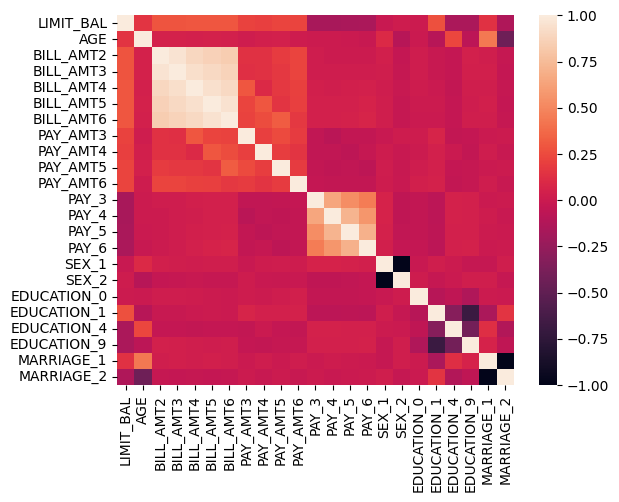

In [281]:
sns.heatmap(X.corr())

In [282]:
#sns.pairplot( X_train.sample(1000) )

# Modelo

## Mejores variables

In [283]:
X.shape

(5625, 23)

In [284]:
kb = SelectKBest( k=15, score_func=f_regression )
kb.fit(X, y)
kb.get_feature_names_out()
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print(ls_best)

X_train = pd.DataFrame(kb.transform(X), columns=ls_best)
y_train = y

X_train_cols = ls_best

['LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_1']


In [285]:
X_train.sample(5)

,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_3,PAY_4,PAY_5,PAY_6,EDUCATION_1
1795,"80,000.00","58,756.00","59,587.00","60,997.00","62,856.00","66,897.00","3,000.00","3,000.00","5,100.00",0.00,2.00,0.00,0.00,0.00,1.00
1931,"120,000.00","116,086.00","117,580.00","120,041.00","80,578.00","82,280.00","5,000.00","3,000.00","3,000.00","3,200.00",0.00,0.00,0.00,0.00,0.00
4911,"20,000.00","19,661.00","20,018.00","20,427.00","19,377.00","19,386.00","1,000.00","1,500.00",900.00,"1,000.00",2.00,0.00,0.00,0.00,0.00
226,"100,000.00","44,508.00","42,925.00","45,596.00","46,022.00","46,785.00","3,548.00","1,668.00","1,677.00","1,668.00",2.00,0.00,0.00,0.00,0.00
5400,"120,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Ajuste del modelo

SCORE:  0.3958216796572023 [0.3874281  0.24158713 0.44069897 0.39278669]
MEAN 0.3656252204461956
STD 0.07455640035943834
R-squared: 0.3958
Mean squared error: 115516212.4118
Root mean squared error: 10747.8469
Mean Absolute Error: 4862.3659


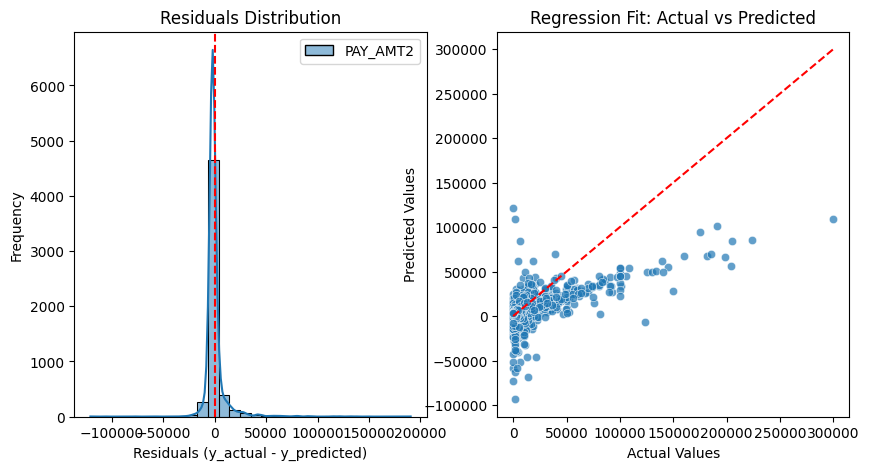

LIMIT_BAL = 0.0107926919
BILL_AMT2 = -0.3100414383
BILL_AMT3 = 0.4191916372
BILL_AMT4 = -0.0516073309
BILL_AMT5 = 0.0260726161
BILL_AMT6 = -0.0532082252
PAY_AMT3 = 0.1761822623
PAY_AMT4 = 0.0205724931
PAY_AMT5 = 0.0669812591
PAY_AMT6 = 0.0528334161
PAY_3 = -1879.7807275456
PAY_4 = 1055.983789607
PAY_5 = -276.8805593419
PAY_6 = 4.160840648
EDUCATION_1 = -86.608200657
Intercept: [1265.15052727]

Feature Coefficients:
         Feature  Coefficient
0     LIMIT_BAL         0.01
1     BILL_AMT2        -0.31
2     BILL_AMT3         0.42
3     BILL_AMT4        -0.05
4     BILL_AMT5         0.03
5     BILL_AMT6        -0.05
6      PAY_AMT3         0.18
7      PAY_AMT4         0.02
8      PAY_AMT5         0.07
9      PAY_AMT6         0.05
10        PAY_3    -1,879.78
11        PAY_4     1,055.98
12        PAY_5      -276.88
13        PAY_6         4.16
14  EDUCATION_1       -86.61


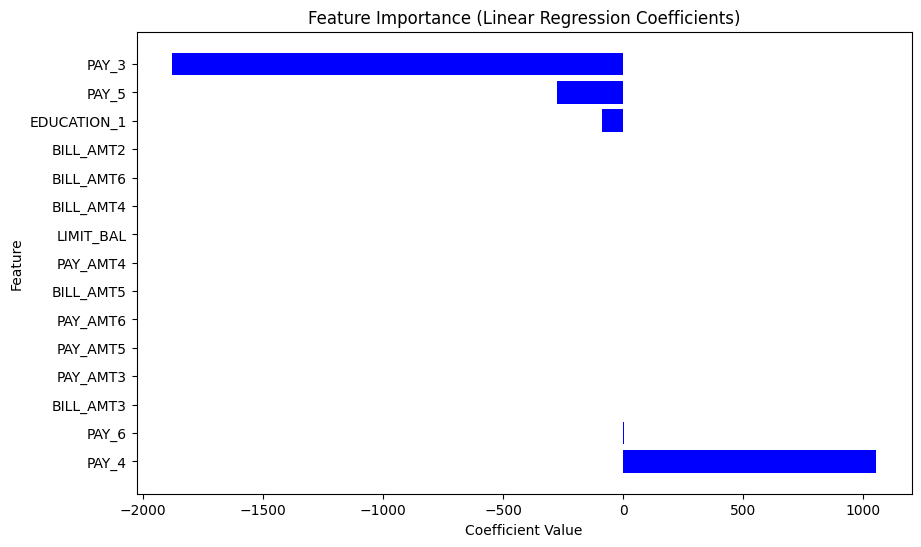

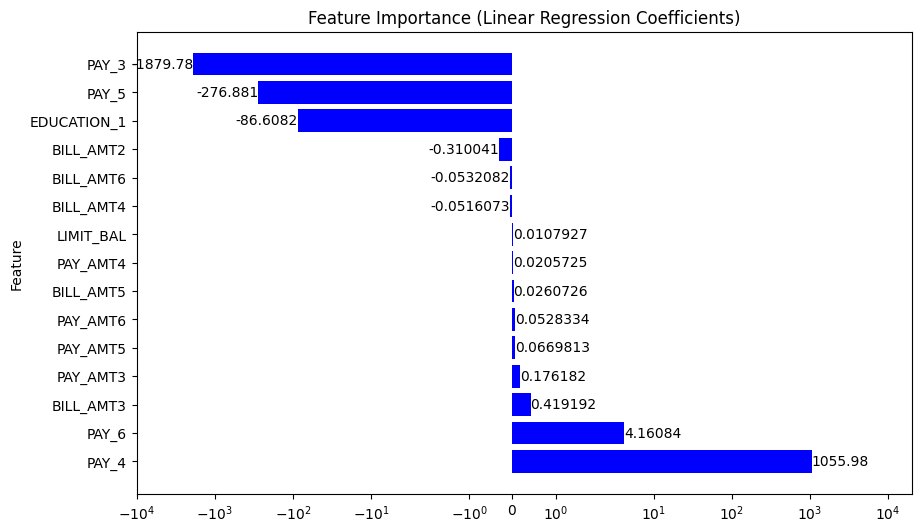

In [303]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("SCORE: ", linreg.score(X_train, y_train), end=' ')
ls_scores = cross_val_score(cv = 4, estimator=linreg, X=X_train, y=y_train)
print(ls_scores)
print("MEAN", np.mean(ls_scores))
print("STD", np.std(ls_scores))

# Make predictions.
y_pred = linreg.predict(X_train) 
y_train = pd.DataFrame(y_train)


# Calculate and print errors.
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse:.4f}")
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")
mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
print(f"Mean Absolute Error: {mae:.4f}")

plt.figure(figsize=(10,5))
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_train - linreg.predict(X_train)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

x_ = np.array(y_train)[:,0]
y_ = y_pred[:,0]
# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=x_, y=y_, alpha=0.7)
plt.plot([min(x_), max(x_)], [min(x_), max(x_)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train_cols[i], "=", linreg.coef_[0][i].round(10))

# Extraer información del modelo
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_train_cols, "Coefficient": linreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
ax = plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlim(-10000, 20000)
plt.xscale('symlog')  # Use 'symlog' for signed data (both positive and negative)
plt.bar_label(ax, label_type='edge')
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [287]:
pd.to_pickle(linreg, "/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_PAY_AMT2.pickle")

In [293]:
def procesar_dataframe(df):

    df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3']].apply(lambda row: (row > 0).sum(), axis=1)
    df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
    df[ 'Max_Retraso_Reciente' ] = df[['PAY_4', 'PAY_3']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)
  
    lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

    df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row.mean(), axis=1)
    df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
    df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
    df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
    df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT2'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
    df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT2'] / row['LIMIT_BAL'])*100, axis=1)
    df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*6)*100 , axis=1)

    lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
    
    df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT4','PAY_AMT3']].apply(lambda row: row.sum()/3, axis=1)
    df['Suma_Pagos_Historicos'] = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3']].apply(lambda row: row.sum(), axis=1)
    df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
    df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT4'] - row['PAY_AMT3'], axis=1)
    df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT3'] > 0, (df['PAY_AMT3'] / df['BILL_AMT3'])*100, 0)

    df['LIMIT_BAL_sq'] = df['LIMIT_BAL'] ** 2

    lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior', 'LIMIT_BAL_sq']
    
    df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

    lst_var_4 = ['Edad_x_Limite_Credito']

    # (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
    df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
    df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
    #display(df['EDUCATION'].value_counts().sort_index())
    df['EDUCATION'] = df['EDUCATION']**2
    #display(df['EDUCATION'].value_counts().sort_index())

    # * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
    # display(df['MARRIAGE'].value_counts().sort_index())
    df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
    # display(df['MARRIAGE'].value_counts().sort_index())

    df['SEX'] = df['SEX'].astype(str)
    df['EDUCATION'] = df['EDUCATION'].astype(str)
    df['MARRIAGE'] = df['MARRIAGE'].astype(str)

    df['PAY_3'] = df['PAY_3'].map(lambda x: x if x > 0 else 0)
    df['PAY_4'] = df['PAY_4'].map(lambda x: x if x > 0 else 0)
    df['PAY_5'] = df['PAY_5'].map(lambda x: x if x > 0 else 0)
    df['PAY_6'] = df['PAY_6'].map(lambda x: x if x > 0 else 0)

    # df['PAY_3'] = df['PAY_3'].astype(str)
    # df['PAY_4'] = df['PAY_4'].astype(str)
    # df['PAY_5'] = df['PAY_5'].astype(str)
    # df['PAY_6'] = df['PAY_6'].astype(str)

    # Unidad muestral
    var_um = ['CUSTOMER_ID']

    # Variables categoricas
    var_cat = ['SEX', 'EDUCATION', 'MARRIAGE',
                                    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6']

    # Variables numericas
    var_num = ['LIMIT_BAL','AGE',
                        'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',              
            ] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
            #] + lst_var_4

    var_tgt = ['PAY_AMT2']

    X = df.drop(columns=var_cat)[ var_um + var_num ].join(pd.get_dummies(df[var_cat], dtype='int'))
    
    return X

#ls_best = ['LIMIT_BAL','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT3','PAY_AMT4','PAY_AMT5',
#           'Promedio_Deuda_Ultimos_3_Meses','Cambio_Deuda_Reciente','Suma_Deuda_Total_Historica','Max_Deuda_Historica','Promedio_Pago_Ultimos_Meses','Suma_Pagos_Historicos']

df = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/val_PAY_AMT2.csv', delimiter='|')
df.head()

val_PAY_AMT2 = procesar_dataframe(df)[['CUSTOMER_ID'] + ls_best]
print( val_PAY_AMT2.shape )
val_PAY_AMT2.head()


(1875, 16)


,CUSTOMER_ID,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_3,PAY_4,PAY_5,PAY_6,EDUCATION_1
0,29161,"240,000.00","104,498.00","106,628.00","102,650.00",0.00,0.00,0.00,0.00,0.00,0.00,2,2,2,0,0
1,12504,"140,000.00","109,717.00","81,545.00","81,454.00","60,176.00","79,728.00","2,000.00","3,000.00","20,000.00","1,500.00",0,0,0,0,0
2,21923,"200,000.00","153,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
3,6573,"170,000.00",0.00,0.00,467.00,203.00,0.00,467.00,203.00,0.00,"1,116.00",0,0,0,0,0
4,23848,"130,000.00","37,939.00","37,705.00","37,391.00","38,137.00","37,647.00","1,586.00","1,332.00","1,352.00","1,382.00",0,0,0,0,0


In [294]:
results = pd.DataFrame(
    {'CUSTOMER_ID': val_PAY_AMT2['CUSTOMER_ID'],
    'y_hat':  pd.DataFrame(linreg.predict( val_PAY_AMT2[ ls_best ] ))[0]}
)

In [295]:
results

,CUSTOMER_ID,y_hat
0,29161,"8,655.40"
1,12504,"-2,101.61"
2,21923,"-44,291.69"
3,6573,"3,226.52"
4,23848,"4,243.11"
...,...,...
1870,22689,"10,722.41"
1871,28049,"2,002.62"
1872,19645,"5,512.74"
1873,18610,"2,406.77"


In [297]:
results.to_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_PAY_AMT2.csv', index=False)

<Axes: ylabel='Frequency'>

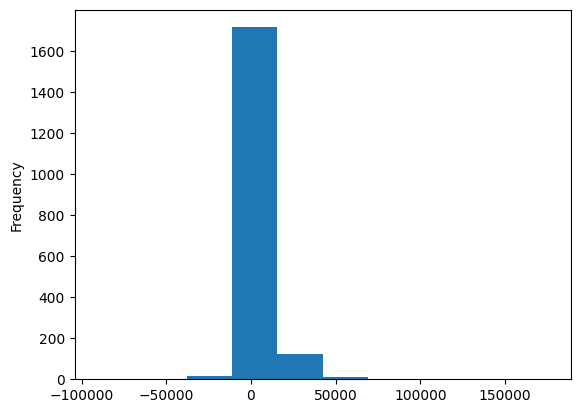

In [296]:
results['y_hat'].plot(kind='hist')